# **Latent Dirichlet Allocation (LDA) Analysis: Social Media Analysis on Coffee Brand Engagement**

EMIMM0139 Social Media and Web Analytics

Chananchida Siriouychai 2641729

In [15]:
!pip install --upgrade numpy==1.24.3
!pip install --upgrade gensim==4.3.1
!pip install --upgrade --force-reinstall jax jaxlib
!pip install --upgrade pandas
!pip install bertopic
!pip install --upgrade numpy
!pip install --upgrade gensim
!pip install pyLDAvis
!pip install xarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 98.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is in

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Success

In [ ]:
from bertopic import BERTopic
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import numpy as np
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim import corpora
import gensim.corpora as corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim


## Data Preprocessing

In [2]:
# Download necessary NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
# Load the Excel file into a DataFrame
import pandas as pd
from nltk.corpus import stopwords # Import stopwords

df_review = pd.read_excel("pretrained_model.xlsx")

#Add custom stopwords
nltk_stopwords = set(stopwords.words('english'))
custom_stopwords = ["this", "that", "it", "I", "the", "a", "an", "and", "but",
                    "or", "with", "for", "of", "to", "in", "on", "use", "used",
                    "try", "tried", "drink", "serve", "prepare", "pour",
                    "add", "stir", "create", "test", "flavor" "yesterday", "today",
                    "now", "ago", "time", "hours"]

final_stopwords = nltk_stopwords.union(custom_stopwords)

df_review.head()

,Reviewer Name,Review Title,Review Body,Review Date,Sentiment
0,Betty T.,Delicious!,Delicious!,20 hours ago,Positive
1,Celena M.,Caramel Heaven!,This has helped me stop buying coffee out ever...,Yesterday,Positive
2,Michael B.,My Favorite,Caramel has always had a special place in my h...,Yesterday,Positive
3,Michael B.,Its Top,Top notch flavor and I’m always excited to see...,Yesterday,Positive
4,Dekotah P.,Caramel Coffee,It arrived quick and tastes sooooo good. I lov...,Yesterday,Positive


In [12]:

# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation and numbers (keep only alphabets and whitespace)
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenize the text into words
    tokens = word_tokenize(text)

    # 4. Remove stopwords and optionally perform stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    # 5. Join tokens back into a string (if needed)
    processed_text = ' '.join(tokens)
    return processed_text

# Define the column to apply preprocessing to
text_column = 'Review Body'  # Replace 'Review Body' with the actual name of your text column if different

# Apply the preprocessing function to the text column
df_review['tokens'] = df[text_column].astype(str).apply(preprocess_text)

# Preview the DataFrame to check results
df_review[[text_column, 'tokens']]

,Review Body,tokens
0,Delicious!,delici
1,This has helped me stop buying coffee out ever...,help stop buy coffe everyday work delici mani ...
2,Caramel has always had a special place in my h...,caramel alway special place heart flavor go al...
3,Top notch flavor and I’m always excited to see...,top notch flavor im alway excit see creativ wa...
4,It arrived quick and tastes sooooo good. I lov...,arriv quick tast sooooo good love
...,...,...
6539,1st concentrate that I've tried and love it.,st concentr ive tri love
6540,This works well when I need a coffee fix later...,work well need coffe fix later day dont need c...
6541,I've read a lot of complaints on here and I ha...,ive read lot complaint say bogu coffe absolut ...
6542,I bought a jar of javy to see how it was. I li...,bought jar javi see like fact easi fast good


In [13]:
df_review.head()

,Reviewer Name,Review Title,Review Body,Review Date,Sentiment,tokens
0,Betty T.,Delicious!,Delicious!,20 hours ago,Positive,delici
1,Celena M.,Caramel Heaven!,This has helped me stop buying coffee out ever...,Yesterday,Positive,help stop buy coffe everyday work delici mani ...
2,Michael B.,My Favorite,Caramel has always had a special place in my h...,Yesterday,Positive,caramel alway special place heart flavor go al...
3,Michael B.,Its Top,Top notch flavor and I’m always excited to see...,Yesterday,Positive,top notch flavor im alway excit see creativ wa...
4,Dekotah P.,Caramel Coffee,It arrived quick and tastes sooooo good. I lov...,Yesterday,Positive,arriv quick tast sooooo good love


# *LDA on Review Dataset*

In [ ]:
# Train LDA on Review Data

dictionary_review = corpora.Dictionary(df_review['tokens'])
corpus_review= [dictionary_review.doc2bow(text) for text in df_review['tokens']]

# here we use 5 topics, can you try different number of topics?
lda_model_review = gensim.models.LdaModel(
    corpus=corpus_review,
    id2word=dictionary_review,
    num_topics=5,
    random_state=42,
    passes=15,
    iterations=500,
    alpha='auto',
    eta='auto',
    minimum_probability=0.01
)

# Output LDA topics with top 10 keywords
print("\n=== LDA Topics ===")
for topic_id, words in lda_model_review.show_topics(num_topics=5, num_words=10, formatted=False):
    print(f"Topic {topic_id}: {[word for word, _ in words]}")





=== LDA Topics ===
Topic 0: ['flavor', 'like', 'taste', 'good', 'coffee', 'really', 'one', 'Love', 'great', 'smooth']
Topic 1: ['milk', 'like', 'coffee', 'use', 'creamer', 'good', 'water', 'ice', 'cream', 'love']
Topic 2: ['bottle', 'try', 'would', 'good', 'first', 'caramel', 'wish', 'time', 'product', 'order']
Topic 3: ['coffee', 'love', 'make', 'iced', 'Javy', 'easy', 'great', 'morning', 'cold', 'delicious']
Topic 4: ['one', 'favorite', 'good', 'Really', 'far', 'One', 'around', 'flavors', 'Carmel', 'decaf']


# *BERTopic on Review Dataset*

In [ ]:
# Train BERTopic on Review Data

topic_model_review = BERTopic()
topics_review, probs_review = topic_model_review.fit_transform(df_review['Review Body'])

# Get BERTopic topics
bertopic_topics = topic_model_review.get_topics()
num_bertopic_topics = len(bertopic_topics)

# Output BERTopic results
print(f"\n=== BERTopic: {num_bertopic_topics} Topics Found ===")
for topic_id, words in bertopic_topics.items():
    print(f"Topic {topic_id}: {[word for word, _ in words[:10]]}")


=== BERTopic: 102 Topics Found ===
Topic -1: ['and', 'it', 'the', 'to', 'coffee', 'of', 'my', 'this', 'so', 'is']
Topic 0: ['iced', 'coffee', 'ice', 'make', 'makes', 'easy', 'to', 'for', 'in', 'great']
Topic 1: ['javy', 'coffee', 'to', 'so', 'and', 'my', 'on', 'me', 'javvy', 'im']
Topic 2: ['protein', 'shake', 'shakes', 'morning', 'with', 'my', 'mix', 'in', 'add', 'mixed']
Topic 3: ['javy', 'javvy', 'flavors', 'and', 'with', 'flavor', 'its', 'love', 'the', 'it']
Topic 4: ['coffee', 'love', 'this', 'much', 'best', 'so', 'go', 'absolutely', 'ever', 'is']
Topic 5: ['javy', 'iced', 'ice', 'brew', 'make', 'coffee', 'home', 'at', 'for', 'to']
Topic 6: ['concentrate', 'coffee', 'best', 'is', 'the', 'this', 'that', 'of', 'than', 'to']
Topic 7: ['milk', 'almond', 'with', 'oat', 'creamer', 'syrup', 'mixed', 'oatmilk', 'coconut', 'and']
Topic 8: ['caramel', 'flavor', 'favorite', 'good', 'far', 'this', 'one', 'loved', 'really', 'is']
Topic 9: ['favorite', 'flavor', 'far', 'my', 'this', '2nd', 'li

# **Coherence Scores**

In [ ]:
# Extract the top 10 keywords for each BERTopic topic
ber_topic_tokens = [[word for word, _ in topic[:10]] for topic in bertopic_topics.values()]

# Filter out any empty topics to avoid errors
ber_topic_tokens = [topic for topic in ber_topic_tokens if topic]

# Compute Coherence Score for LDA
coherence_model_lda = CoherenceModel(
    model=lda_model_review, texts=df_review['tokens'], dictionary=dictionary_review, coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()

# Compute Coherence Score for BERTopic using the LDA dictionary
coherence_model_bertopic = CoherenceModel(
    topics=ber_topic_tokens, texts=df_review['tokens'], dictionary=dictionary_review, coherence='c_v'
)
coherence_bertopic = coherence_model_bertopic.get_coherence()

print(f"LDA Coherence Score: {coherence_lda:.3f}")
print(f"BERTopic Coherence Score: {coherence_bertopic:.3f}")

LDA Coherence Score: 0.461
BERTopic Coherence Score: 0.413


# **Diversity Scores**

In [ ]:
# LDA diversity
def calculate_lda_topic_diversity(lda_model, top_n_words=10):
    topics = lda_model.show_topics(num_topics=lda_model.num_topics, num_words=top_n_words, formatted=False)
    unique_words = set()
    for topic in topics:
        unique_words.update([word for word, _ in topic[1]])
    return len(unique_words) / (top_n_words * lda_model.num_topics)

lda_topic_diversity = calculate_lda_topic_diversity(lda_model_review)

# BERTopic diversity
def calculate_topic_diversity(model, top_n_words=10):
    words = model.get_topics()
    unique_words = set()
    for topic in words.values():
        unique_words.update([word for word, _ in topic[:top_n_words]])
    return len(unique_words) / (top_n_words * len(words))

bertopic_topic_diversity = calculate_topic_diversity(topic_model_review)

print(f"LDA Topic Diversity Score: {lda_topic_diversity:.3f}")
print(f"BERTopic Topic Diversity Score: {bertopic_topic_diversity:.3f}")

LDA Topic Diversity Score: 0.820
BERTopic Topic Diversity Score: 0.561


# *Optimal Number of Topics*

Num Topics: 2, Coherence Score: 0.4999
Num Topics: 3, Coherence Score: 0.5030
Num Topics: 4, Coherence Score: 0.5040
Num Topics: 5, Coherence Score: 0.4933
Num Topics: 6, Coherence Score: 0.5136
Num Topics: 7, Coherence Score: 0.5034
Num Topics: 8, Coherence Score: 0.5084
Num Topics: 9, Coherence Score: 0.5158
Num Topics: 10, Coherence Score: 0.5180
Num Topics: 11, Coherence Score: 0.5005
Num Topics: 12, Coherence Score: 0.5021
Num Topics: 13, Coherence Score: 0.4958
Num Topics: 14, Coherence Score: 0.4798
Num Topics: 15, Coherence Score: 0.4785
Num Topics: 16, Coherence Score: 0.4719
Num Topics: 17, Coherence Score: 0.4596
Num Topics: 18, Coherence Score: 0.4676
Num Topics: 19, Coherence Score: 0.4760


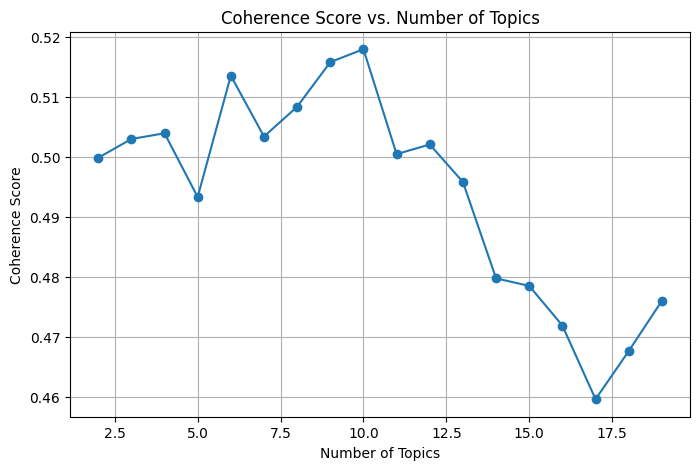

Optimal Number of Topics: 10


In [ ]:
tokenized_texts = df_review['tokens'].tolist()

dictionary_review = corpora.Dictionary(tokenized_texts)
corpus_review = [dictionary_review.doc2bow(text) for text in tokenized_texts]

def compute_coherence_values(dictionary, corpus, texts, topic_range):
    coherence_scores = []
    for num_topics in topic_range:
        lda_model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            passes=10,
            iterations=200
        )
        coherence_model = CoherenceModel(
            model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v'
        )
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)
        print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

    return coherence_scores


topic_range = range(2, 20)

coherence_scores = compute_coherence_values(dictionary_review, corpus_review, tokenized_texts, topic_range)

plt.figure(figsize=(8, 5))
plt.plot(topic_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.grid()
plt.show()

optimal_topic_num = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal Number of Topics: {optimal_topic_num}")



In [ ]:
#Intertopic Distance Map
dictionary_review = corpora.Dictionary(df_review['tokens'])
corpus_tweet = [dictionary_review.doc2bow(text) for text in df_review['tokens']]

num_topics = 10
lda_model = gensim.models.LdaModel(
    corpus=corpus_review,
    id2word=dictionary_review,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    iterations=200
)
pyLDAvis.enable_notebook(local=True)

vis = pyLDAvis.gensim.prepare(lda_model, corpus_review, dictionary_review)

vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.174433  0.018441       1        1  20.419701
7      0.155726 -0.023168       2        1  13.280095
0      0.127864 -0.023193       3        1  12.123751
2      0.130023 -0.018880       4        1  11.911783
1      0.036294  0.084603       5        1  10.324726
5     -0.247727  0.169747       6        1   8.584620
6      0.012206 -0.046405       7        1   7.326471
8     -0.048168  0.017540       8        1   6.956908
9     -0.135428  0.136579       9        1   6.456842
4     -0.205223 -0.315266      10        1   2.615102, topic_info=         Term         Freq        Total Category  logprob  loglift
50       good  1235.000000  1235.000000  Default  30.0000  30.0000
28     flavor  1418.000000  1418.000000  Default  29.0000  29.0000
94       Love   434.000000   434.000000  Default  28.0000  28.0000
115   protein   358.000000   358.000000  Default  27.0000  27.0000
79       like  1160.000000  1160.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1330      lol    10.646592    29.584162  Topic10  -5.2412   2.6219
922     Mocha    12.698648    84.998942  Topic10  -5.0649   1.7427
40       come    11.101317    55.496479  Topic10  -5.1993   2.0346
34    special    10.027713    28.014836  Topic10  -5.3010   2.6165
11       love    10.914551  1192.528700  Topic10  -5.2163  -1.0499

[682 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1916      5  0.934934       15
2015      4  0.948683      1st
296       2  0.235960        2
296       4  0.198703        2
296       5  0.490547        2
...     ...       ...      ...
3353      4  0.955368  wrapped
803       5  0.943783    wrong
345       1  0.130852      yet
345       4  0.013085      yet
345       5  0.850538      yet

[1218 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 1, 3, 2, 6, 7, 9, 10, 5])

In [ ]:
#Term of topics
dictionary_review = corpora.Dictionary(df_review['tokens'])
corpus_review= [dictionary_review.doc2bow(text) for text in df_review['tokens']]


lda_model_review = gensim.models.LdaModel(
    corpus=corpus_review,
    id2word=dictionary_review,
    num_topics=10,
    random_state=42,
    passes=15,
    iterations=500,
    alpha='auto',
    eta='auto',
    minimum_probability=0.01
)

# Output LDA topics with top 10 keywords
print("\n=== LDA Topics ===")
for topic_id, words in lda_model_review.show_topics(num_topics=10, num_words=10, formatted=False):
    print(f"Topic {topic_id}: {[word for word, _ in words]}")




=== LDA Topics ===
Topic 0: ['coffee', 'taste', 'like', 'love', 'Great', 'flavor', 'Javy', 'enjoy', 'convenience', 'cold']
Topic 1: ['coffee', 'mocha', 'creamer', 'like', 'water', 'good', 'flavored', 'love', 'milk', 'tried']
Topic 2: ['first', 'order', 'time', 'bottle', 'try', 'bottles', 'coffee', 'would', 'stars', '4']
Topic 3: ['coffee', 'iced', 'make', 'easy', 'love', 'Javy', 'great', 'delicious', 'hot', 'morning']
Topic 4: ['Good', 'Tastes', 'batter', 'brownie', 'Absolutely', 'Nice', 'smooth', 'great', 'Wish', 'like']
Topic 5: ['flavor', 'favorite', 'vanilla', 'milk', 'one', 'sugar', 'far', 'cream', 'creamer', 'French']
Topic 6: ['like', 'really', 'flavor', 'good', 'coffee', 'taste', 'strong', 'great', 'still', 'get']
Topic 7: ['coffee', 'use', 'flavors', 'like', 'Javy', 'product', 'make', 'much', 'concentrate', 'different']
Topic 8: ['good', 'flavor', 'one', 'like', 'pretty', 'caramel', 'favorite', 'taste', 'love', 'would']
Topic 9: ['Love', 'protein', 'shake', 'morning', 'flavor